In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [4]:
(train_data, train_labels), _ = imdb.load_data(num_words = 10000)

def vectorize_sequence(sequences, dimensions = 10000):
    result = np.zeros((len(sequences), dimensions), dtype = np.float32)
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.0
    return result

train_data = vectorize_sequence(train_data)

model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )
history_orig = model.fit(train_data,
                         train_labels,
                         epochs = 20,
                         batch_size = 512,
                         validation_split = 0.4
                        )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 209us/sample - loss: 0.5022 - accuracy: 0.7861 - val_loss: 0.3624 - val_accuracy: 0.8791
Epoch 2/20
15000/15000 [==============================] - 2s 128us/sample - loss: 0.2889 - accuracy: 0.9051 - val_loss: 0.3098 - val_accuracy: 0.8810
Epoch 3/20
15000/15000 [==============================] - 2s 154us/sample - loss: 0.2104 - accuracy: 0.9304 - val_loss: 0.2730 - val_accuracy: 0.8918
Epoch 4/20
15000/15000 [==============================] - 2s 133us/sample - loss: 0.1648 - accuracy: 0.9453 - val_loss: 0.2781 - val_accuracy: 0.8909
Epoch 5/20
15000/15000 [==============================] - 2s 132us/sample - loss: 0.1348 - accuracy: 0.9563 - val_loss: 0.2905 - val_accuracy: 0.8876
Epoch 6/20
15000/15000 [==============================] - 2s 129us/sample - loss: 0.1080 - accuracy: 0.9664 - val_loss: 0.3560 - val_accuracy: 0.8710
Epoch 7/20
15000/15000 [==========================

In [5]:
model = keras.Sequential([
    layers.Dense(4, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )
history_smaller = model.fit(train_data,
                            train_labels,
                            epochs = 20,
                            batch_size = 512,
                            validation_split = 0.4
                            )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 222us/sample - loss: 0.6316 - accuracy: 0.7357 - val_loss: 0.5793 - val_accuracy: 0.8089
Epoch 2/20
15000/15000 [==============================] - 2s 111us/sample - loss: 0.5268 - accuracy: 0.8540 - val_loss: 0.4977 - val_accuracy: 0.8656
Epoch 3/20
15000/15000 [==============================] - 2s 115us/sample - loss: 0.4365 - accuracy: 0.8891 - val_loss: 0.4219 - val_accuracy: 0.8725
Epoch 4/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.3609 - accuracy: 0.9048 - val_loss: 0.3671 - val_accuracy: 0.8787
Epoch 5/20
15000/15000 [==============================] - 2s 136us/sample - loss: 0.3036 - accuracy: 0.9163 - val_loss: 0.3319 - val_accuracy: 0.8827
Epoch 6/20
15000/15000 [==============================] - 2s 113us/sample - loss: 0.2595 - accuracy: 0.9259 - val_loss: 0.3054 - val_accuracy: 0.8879
Epoch 7/20
15000/15000 [==========================

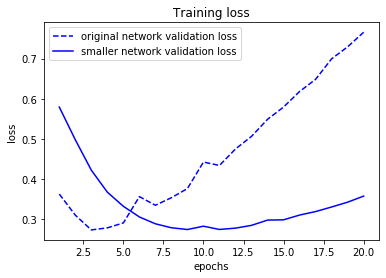

In [7]:
import matplotlib.pyplot as plt

orig_loss = history_orig.history['val_loss']
smaller_loss = history_smaller.history['val_loss']
epochs = range(1, 1 + len(orig_loss))
plt.plot(epochs, orig_loss, 'b--', label = 'original network validation loss')
plt.plot(epochs, smaller_loss, 'b', label = 'smaller network validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training loss')
plt.legend()
plt.show()

Smaller model start overfitting later than the original model and its performance degrade much more slower once it start overfitting

In [9]:
# try a really big model
model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )
history_big = model.fit(train_data,
                            train_labels,
                            epochs = 20,
                            batch_size = 512,
                            validation_split = 0.4
                            )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 16s 1ms/sample - loss: 0.5532 - accuracy: 0.7497 - val_loss: 0.3212 - val_accuracy: 0.8829
Epoch 2/20
15000/15000 [==============================] - 15s 1ms/sample - loss: 0.2497 - accuracy: 0.9019 - val_loss: 0.2650 - val_accuracy: 0.8940
Epoch 3/20
15000/15000 [==============================] - 15s 1000us/sample - loss: 0.1512 - accuracy: 0.9428 - val_loss: 0.2662 - val_accuracy: 0.8931
Epoch 4/20
15000/15000 [==============================] - 15s 1ms/sample - loss: 0.0992 - accuracy: 0.9717 - val_loss: 0.3681 - val_accuracy: 0.8842
Epoch 5/20
15000/15000 [==============================] - 15s 1ms/sample - loss: 0.1115 - accuracy: 0.9755 - val_loss: 0.3267 - val_accuracy: 0.8843
Epoch 6/20
15000/15000 [==============================] - 15s 1ms/sample - loss: 0.0076 - accuracy: 0.9997 - val_loss: 0.5120 - val_accuracy: 0.8884
Epoch 7/20
15000/15000 [=============================

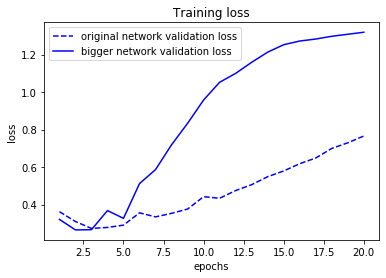

In [10]:
orig_loss = history_orig.history['val_loss']
bigger_loss = history_big.history['val_loss']
epochs = range(1, 1 + len(orig_loss))
plt.plot(epochs, orig_loss, 'b--', label = 'original network validation loss')
plt.plot(epochs, bigger_loss, 'b', label = 'bigger network validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training loss')
plt.legend()
plt.show()

Loss of a too big model looks choppy and has a high variance  
It also starts overfitting right after the 1st epoch  
The more capacity the model has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss)

In [11]:
from tensorflow.keras import regularizers
# use L2 regularizer to prevent the model from overfitting
model = keras.Sequential([
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.02), activation = 'relu'),
    layers.Dense(16, kernel_regularizer = regularizers.l2(0.02), activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

history_l2 = model.fit(train_data,
                        train_labels,
                        epochs = 20,
                        batch_size = 512,
                        validation_split = 0.4
                        )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 218us/sample - loss: 0.9689 - accuracy: 0.7577 - val_loss: 0.7781 - val_accuracy: 0.8552
Epoch 2/20
15000/15000 [==============================] - 2s 144us/sample - loss: 0.7318 - accuracy: 0.8624 - val_loss: 0.6950 - val_accuracy: 0.8655
Epoch 3/20
15000/15000 [==============================] - 2s 140us/sample - loss: 0.6675 - accuracy: 0.8678 - val_loss: 0.6595 - val_accuracy: 0.8542
Epoch 4/20
15000/15000 [==============================] - 2s 140us/sample - loss: 0.6228 - accuracy: 0.8716 - val_loss: 0.6329 - val_accuracy: 0.8493
Epoch 5/20
15000/15000 [==============================] - 2s 128us/sample - loss: 0.5902 - accuracy: 0.8777 - val_loss: 0.5967 - val_accuracy: 0.8593
Epoch 6/20
15000/15000 [==============================] - 2s 135us/sample - loss: 0.5617 - accuracy: 0.8804 - val_loss: 0.6177 - val_accuracy: 0.8281
Epoch 7/20
15000/15000 [==========================

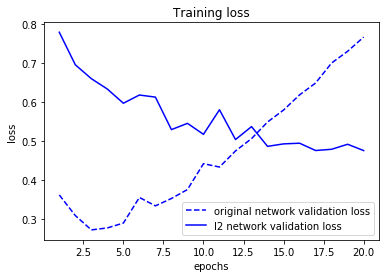

In [12]:
orig_loss = history_orig.history['val_loss']
l2_loss = history_l2.history['val_loss']
epochs = range(1, 1 + len(orig_loss))
plt.plot(epochs, orig_loss, 'b--', label = 'original network validation loss')
plt.plot(epochs, l2_loss, 'b', label = 'l2 network validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training loss')
plt.legend()
plt.show()

L2 regularizer is just suitable for a small enough model (according to the data)  
If we have a really big model comparing to the data, we need to use another method: dropout

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 210us/sample - loss: 0.6345 - accuracy: 0.6359 - val_loss: 0.5090 - val_accuracy: 0.8349
Epoch 2/20
15000/15000 [==============================] - 2s 123us/sample - loss: 0.5041 - accuracy: 0.7703 - val_loss: 0.3891 - val_accuracy: 0.8715
Epoch 3/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.4151 - accuracy: 0.8317 - val_loss: 0.3255 - val_accuracy: 0.8823
Epoch 4/20
15000/15000 [==============================] - 2s 135us/sample - loss: 0.3497 - accuracy: 0.8658 - val_loss: 0.2908 - val_accuracy: 0.8877
Epoch 5/20
15000/15000 [==============================] - 2s 144us/sample - loss: 0.3022 - accuracy: 0.8883 - val_loss: 0.3003 - val_accuracy: 0.8809
Epoch 6/20
15000/15000 [==============================] - 2s 126us/sample - loss: 0.2656 - accuracy: 0.9049 - val_loss: 0.2907 - val_accuracy: 0.8865
Epoch 7/20
15000/15000 [==========================

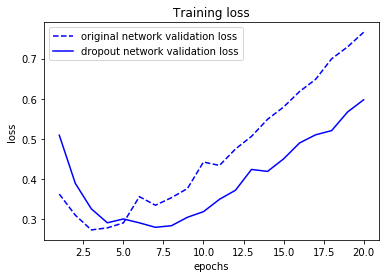

In [13]:
from tensorflow.keras import regularizers
# use dropout to prevent the model from overfitting
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
             )

history_dropout = model.fit(train_data,
                        train_labels,
                        epochs = 20,
                        batch_size = 512,
                        validation_split = 0.4
                        )

orig_loss = history_orig.history['val_loss']
dropout_loss = history_dropout.history['val_loss']
epochs = range(1, 1 + len(orig_loss))
plt.plot(epochs, orig_loss, 'b--', label = 'original network validation loss')
plt.plot(epochs, dropout_loss, 'b', label = 'dropout network validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training loss')
plt.legend()
plt.show()